In [1]:
# CELL 0 — Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use("seaborn-v0_8-whitegrid")


/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_12668/3577118552.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start="2021-01-01", periods=48, freq="M")


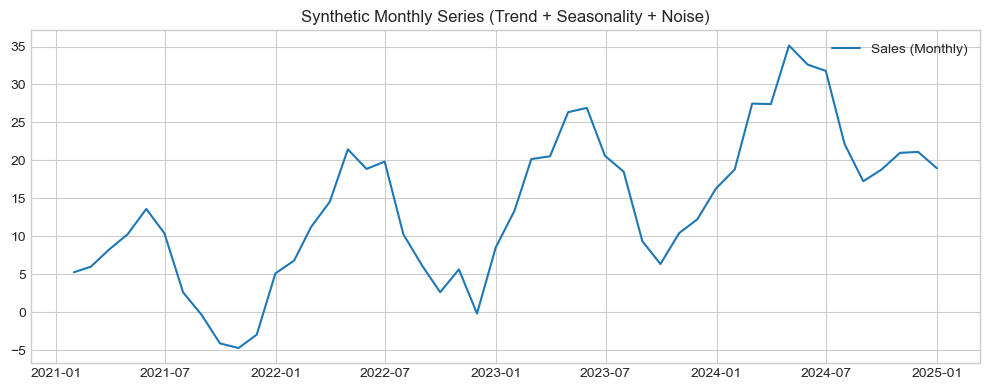

In [2]:
# CELL 1 — Create a time series `ts` (monthly, 4 years, with trend + yearly seasonality + noise)

# Synthetic but realistic monthly series (48 months)
idx = pd.date_range(start="2021-01-01", periods=48, freq="M")

# Components: linear trend + yearly seasonality + random noise
t = np.arange(48)
trend = 0.6 * t
seasonal = 10 * np.sin(2 * np.pi * t / 12)  # yearly (12-month) seasonality
noise = np.random.normal(scale=2.0, size=48)

ts = pd.Series(trend + seasonal + noise, index=idx, name="Sales")

# Quick peek
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ts, label="Sales (Monthly)")
ax.set_title("Synthetic Monthly Series (Trend + Seasonality + Noise)")
ax.legend()
plt.tight_layout()
plt.show()


In [7]:
ts.iloc[:-12]

2021-01-31     5.251769
2021-02-28     5.977873
2021-03-31     8.287986
2021-04-30    10.255714
2021-05-31    13.594446
2021-06-30    10.383481
2021-07-31     2.599855
2021-08-31    -0.397770
2021-09-30    -4.125963
2021-10-31    -4.732701
2021-11-30    -2.970205
2021-12-31     5.104939
2022-01-31     6.790496
2022-02-28    11.212775
2022-03-31    14.534901
2022-04-30    21.448838
2022-05-31    18.862719
2022-06-30    19.835418
2022-07-31    10.246935
2022-08-31     6.137740
2022-09-30     2.618286
2022-10-31     5.633782
2022-11-30    -0.192743
2022-12-31     8.517344
2023-01-31    13.337231
2023-02-28    20.166617
2023-03-31    20.532591
2023-04-30    26.344193
2023-05-31    26.908993
2023-06-30    20.599205
2023-07-31    18.506006
2023-08-31     9.344443
2023-09-30     6.337384
2023-10-31    10.415235
2023-11-30    12.221819
2023-12-31    16.286816
Freq: ME, Name: Sales, dtype: float64

In [8]:
# CELL 2 — Chronological split, fit ARIMA(1,1,1), get residuals

# Last 12 months as a simple holdout
train = ts.iloc[:-12]
test  = ts.iloc[-12:]

# Fit ARIMA on TRAIN only
model = ARIMA(train, order=(1,1,1))
fit = model.fit()

# Residuals from the fitted model (in-sample)
resid = fit.resid

print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.482
Date:                Mon, 01 Dec 2025   AIC                            210.965
Time:                        10:27:29   BIC                            215.631
Sample:                    01-31-2021   HQIC                           212.575
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.511      0.956      0.339      -0.513       1.489
ma.L1         -0.2094      0.584     -0.358      0.720      -1.354       0.936
sigma2        20.3963      5.471      3.728      0.0

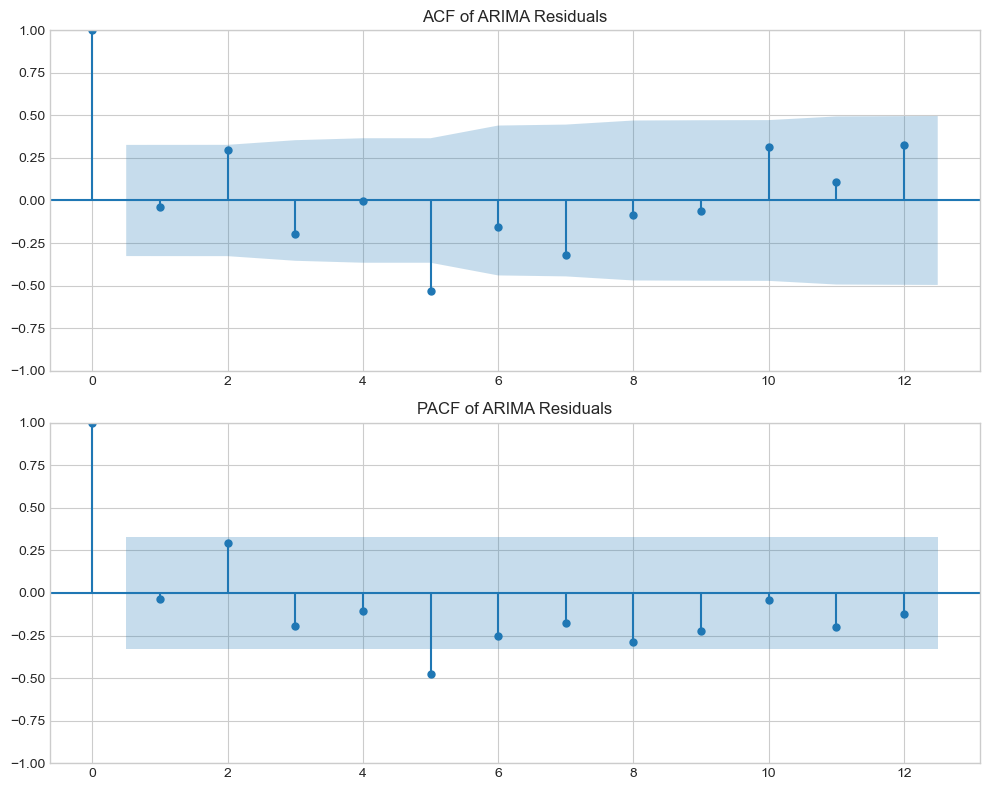

In [9]:
# CELL 3 — Residual ACF & PACF

fig, ax = plt.subplots(2, 1, figsize=(10,8))
plot_acf(resid, ax=ax[0], lags=12)
ax[0].set_title("ACF of ARIMA Residuals")

plot_pacf(resid, ax=ax[1], lags=12, method="ywm")
ax[1].set_title("PACF of ARIMA Residuals")

plt.tight_layout()
plt.show()


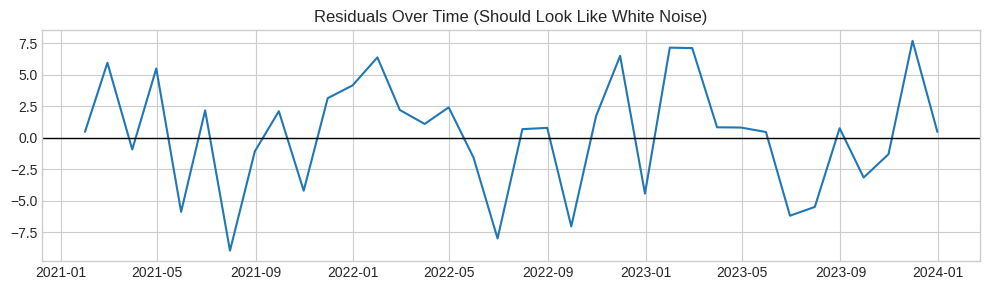

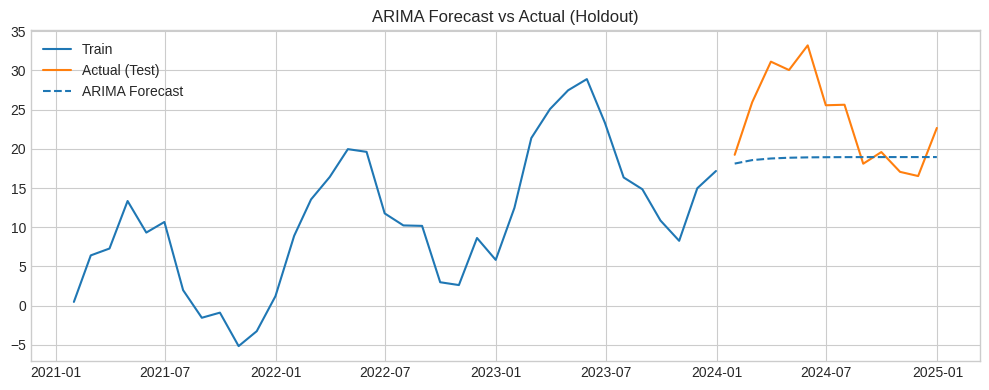

In [6]:
# CELL 4 — (Optional) Visual residual check & simple forecast plot

# Residuals over time (should look like random noise around 0)
plt.figure(figsize=(10,3))
plt.plot(resid)
plt.axhline(0, color="black", lw=1)
plt.title("Residuals Over Time (Should Look Like White Noise)")
plt.tight_layout()
plt.show()

# Forecast next 12 and compare visually
pred = fit.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test,  label="Actual (Test)", color="#ff7f0e")
plt.plot(pred,  label="ARIMA Forecast", color="#1f77b4", ls="--")
plt.title("ARIMA Forecast vs Actual (Holdout)")
plt.legend()
plt.tight_layout()
plt.show()
